In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
#from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annastaroverova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [112]:
import os
def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = '/pics/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

### Readind data in csv-format: 

[here](https://www.kaggle.com/arhamrumi/amazon-product-reviews) you can find dataset used in this work

In [82]:
df = pd.read_csv('/Reviews.csv')

Using this data we can try different approaches for classification. 

First, I apply a simple Logistic Regression;
After that, I will try Logistic Regression on multi-class method;
At the end, there is a Random Forest model given.

I will use precision score as a metrics to measure model-quality.


Exploratory analysis: I will process data, look for descriptive statistics, histograms and some examples.
Text transformation: I use nltk to get tokens and get rid of noise.


In [30]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [31]:
df.shape

(568454, 10)

Data has 568454 observations 
Now Im changing Score values with binary target variable: if our Score was more than 3 (target = 1) or less (target = 0). 

In [32]:
df['target'] = 0

df.loc[df['Score'].apply(lambda x: x >= 4), 'target'] = 1

In [33]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,target
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [34]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
target                     int64
dtype: object

Counting observations for each of the Score value we get histogram for Score in proportion of number of observations.

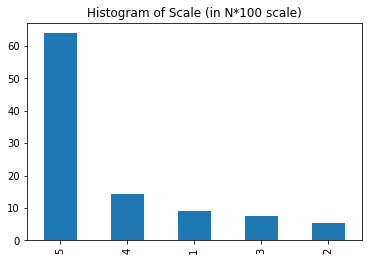

<ipython-input-112-dfa3981692f8>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('{}.{}'.format(name, fmt), fmt='png')


<Figure size 432x288 with 0 Axes>

In [113]:
rating_pct = df['Score'].value_counts()/len(df) * 100
rating_pct.plot.bar()
plt.title('Histogram of Scale (in N*100 scale)')
plt.show()
#save(name='pic_1', fmt='png')

In [115]:
df.groupby('ProductId').count()
df_products = df.groupby('ProductId').filter(lambda x: len(x) >= 500)
df_product_groups = df_products.groupby('ProductId')
#Count of products and groups
print(len(df_products))
print(len(df_product_groups))

16685
29


## Lets see more details about texts presented:

### Here we have a histogram of the most popular products on Amazon and counts of scores they got

<ipython-input-112-dfa3981692f8>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('{}.{}'.format(name, fmt), fmt='png')


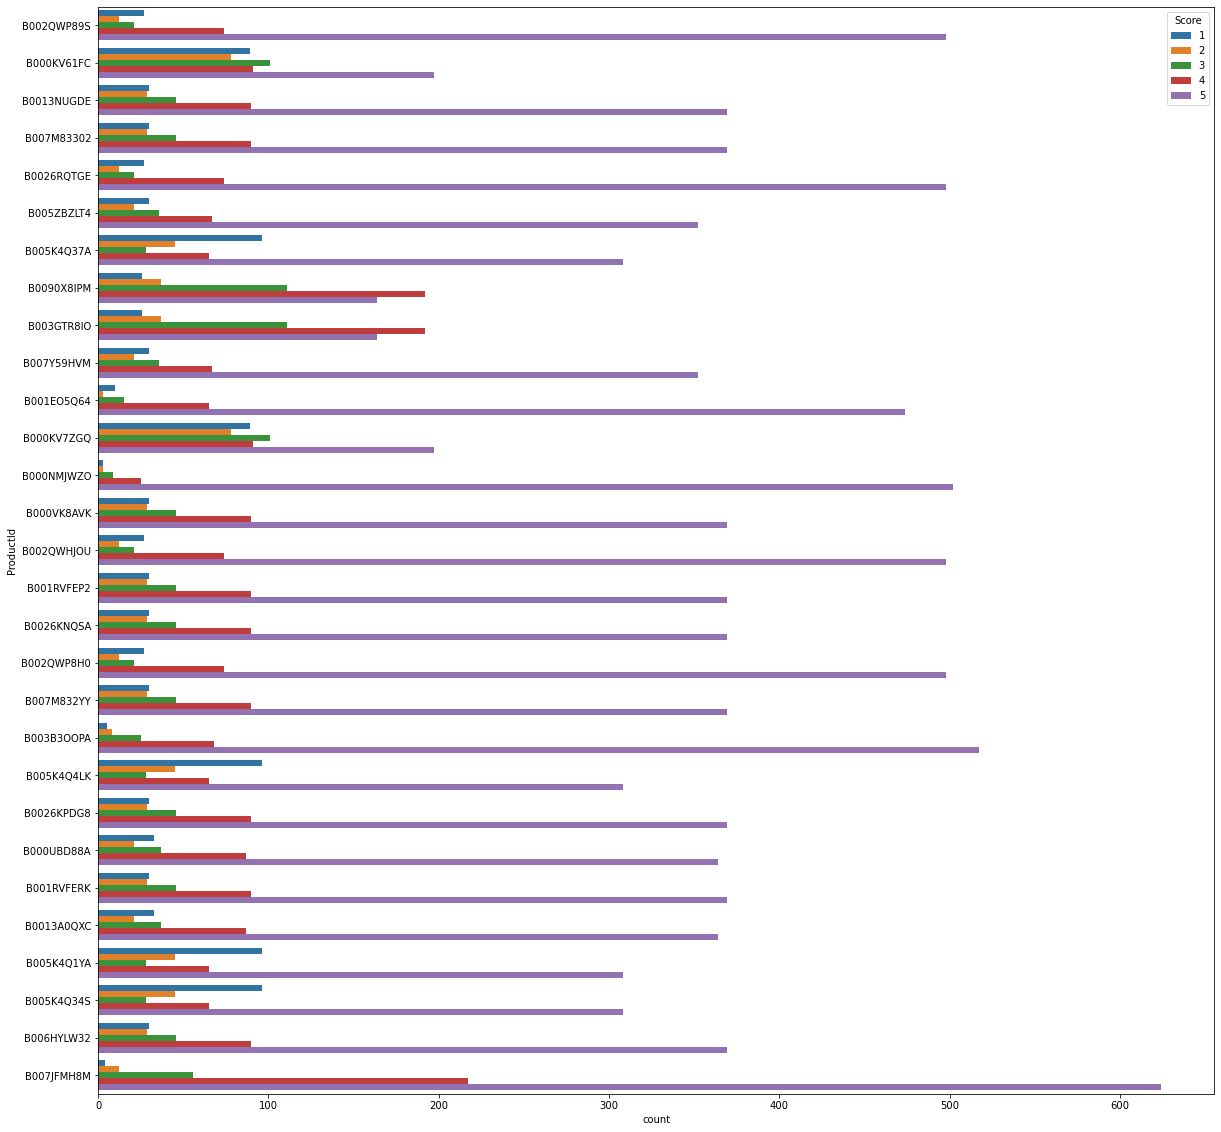

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.countplot(y="ProductId",  hue="Score", data=df_products)

#save(name='pic_2', fmt='png')

In [117]:
df.groupby('UserId').count()
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 150)
df_userGroup = df_users.groupby('UserId')
print("Number of Users:"+ str(len(df_userGroup)))
df_products = df_users.groupby('ProductId')
print("Number of products:"+ str(len(df_products)))


Number of Users:22
Number of products:3310


### Lets see what scores were given by the most active users in our dataset

<ipython-input-112-dfa3981692f8>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('{}.{}'.format(name, fmt), fmt='png')


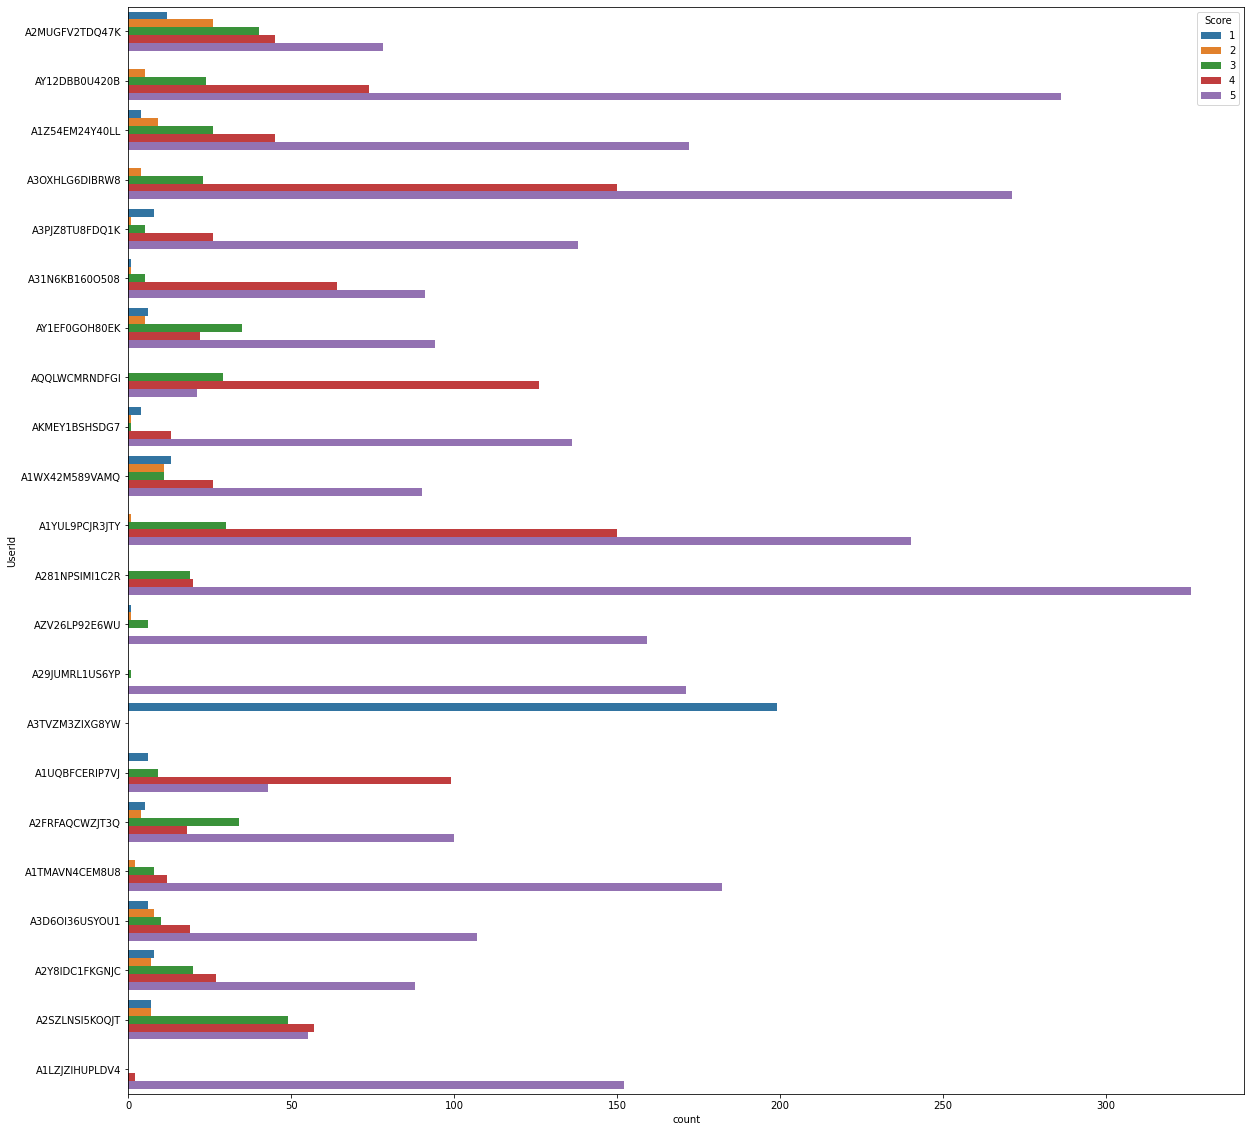

In [118]:
plt.figure(figsize=(20,20))
sns.countplot(y="UserId",  hue="Score", data=df_users)

#save(name='pic_3', fmt='png')

### Hmm... you have wrote more than 300 comments? What is in it? 

In [80]:
df.groupby('UserId').filter(lambda x: len(x) >= 300).head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,1316390400,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...
369,370,B002O3VHXU,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1282176000,Very Smooth Coffee - Highly Recommended,"Green Mountain ""Nantucket Blend"" K-Cups make a..."
813,814,B004ET7MG8,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",3,4,2,1272240000,Odd Fake Flavor - Not Recommended,"Trident ""Strawberry Twist"" sugarless gum is ve..."
1311,1312,B000FAMUO4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1173052800,Superb Pasta!,"*****<br /><br />Oh, I love this pasta! It is ..."
1380,1381,B00068PCTU,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",1,1,5,1143331200,Also look for the packets,If you are looking for a sweetener that is del...


 Ok, now how about 199 only negative ones?

In [79]:
df[df.UserId == 'A3TVZM3ZIXG8YW'].head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2941,2942,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,7,11,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
2947,2948,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,0,2,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
31782,31783,B00106TG9Y,A3TVZM3ZIXG8YW,christopher hayes,2,8,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52496,52497,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,19,21,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52501,52502,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,18,24,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
...,...,...,...,...,...,...,...,...,...,...
499916,499917,B009B87SAC,A3TVZM3ZIXG8YW,christopher hayes,6,14,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
499917,499918,B009B87SAC,A3TVZM3ZIXG8YW,christopher hayes,6,15,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
514140,514141,B003M5VM8O,A3TVZM3ZIXG8YW,christopher hayes,5,9,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
514690,514691,B003MWGSKY,A3TVZM3ZIXG8YW,christopher hayes,3,8,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."


##### Thanks to 'A3TVZM3ZIXG8YW', we are now strongly sure how a negative comment sould look like :)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating1['Summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

Now if we want to use df.target as a target value, we have to drop Score values from data

In [83]:
scoreOriginal = df['Score']
df = df.drop('Score', axis=1)

In [37]:
df['target'].value_counts()

1    443777
0    124677
Name: target, dtype: int64

Getting closer with data

How full are the comments? Lets check

In [38]:
for c in df[df["target"] == 0]["Text"].head(5):
    print(c)


Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.
My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.
I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating

Ok, time to split the data into test and train to train models

In [39]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=43)


In [40]:
test_df["target"].value_counts(), train_df["target"].value_counts()


(1    133226
 0     37311
 Name: target, dtype: int64,
 1    310551
 0     87366
 Name: target, dtype: int64)

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annastaroverova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Processing text into tokens, getting rid of noise:

In [42]:
sentence_example = df.iloc[1]["Text"]
tokens = word_tokenize(sentence_example)
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
stop_words = stopwords.words()
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in stop_words]
snowball = SnowballStemmer(language="english")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]


In [64]:
print(f"Original Text: {sentence_example}")
print("-----------------")
print(f"Tokens: {tokens}")
print("-----------------")
print(f"Tokens without punctuation: {tokens_without_punctuation}")
print("-----------------")
print(f"Tokens without punctuation and stop-words: {tokens_without_stop_words_and_punctuation}")
print("-----------------")
print(f"Tokens after stemming: {stemmed_tokens}")
print("-----------------")


Original Text: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
-----------------
Tokens: ['Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts', '...', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', '.', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', '``', 'Jumbo', "''", '.']
-----------------
Tokens without punctuation: ['Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts', '...', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', '``', 'Jumbo', "''"]
-----------------
Tokens without punctuation and stop-words: ['Product', 'arrived', 'labeled', 'Jumbo', 'Salte

In [44]:
snowball = SnowballStemmer(language="english")
stop_words = stopwords.words()

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="english")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens


In [46]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

## Training the features for the model to use it in our predictions

might take some time

In [65]:
features = vectorizer.fit_transform(train_df["Text"])
#features

KeyboardInterrupt: 

Here we have got a Logistic regression model, which takes only one sentance as an input

In [49]:
model_1 = LogisticRegression(random_state=42)
model_1.fit(features, train_df["target"])


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [51]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
]
)

model_pipeline.fit(train_df["Text"], train_df["target"])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7fa413627d30>)),
                ('model', LogisticRegression(random_state=0))])

The model precision is 0.91 - means 91% of values model has predict as positive review is actually a positive one

In [27]:
precision_score(y_true=test_df["target"], y_pred=model_pipeline.predict(test_df["Text"]))


0.912349629968283

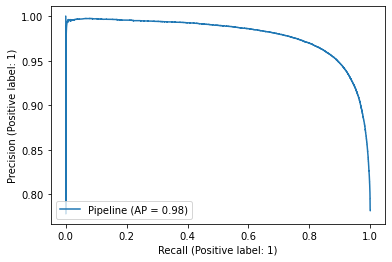

In [29]:
prec, rec, thresholds = precision_recall_curve(y_true=test_df["target"], probas_pred=model_pipeline.predict_proba(test_df["Text"])[:, 1])

plot_precision_recall_curve(estimator=model_pipeline, X=test_df["Text"], y=test_df["target"])


Now turn to non-binary classification:

## Some extra materials

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state = 0)
from sklearn import ensemble
clf_2 = ensemble.BaggingClassifier(random_state=0, n_estimators = 10)
model_tree = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", clf_2)
]
)


model_tree.fit(train_df["Text"], train_df["target"])
#model_tree.fit(features, train_df["target"])



Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7fa3cc80c3a0>)),
                ('model', BaggingClassifier(random_state=0))])

## Final precision score!
For binary classification

In [38]:
precision_score(y_true=test_df["target"], y_pred=model_tree.predict(test_df["Text"]))


0.9205381205220529

In [81]:
print('The different berween two models: ', 0.9205381205220529 - 0.912349629968283)

The different berween two models:  0.008188490553769912


Worth it!